In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
w_data=pd.read_csv("winequality-white.csv", sep=";")
w_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
r_data=pd.read_csv("winequality-red.csv", sep=";")
r_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Multiple Regression

## White Wines

In [6]:
x=w_data.drop(["quality"],axis=1)
y=w_data["quality"].values.reshape(-1,1)
print(x.shape,y.shape)

(4898, 11) (4898, 1)


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(x_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled, y_train_scaled)

LinearRegression()

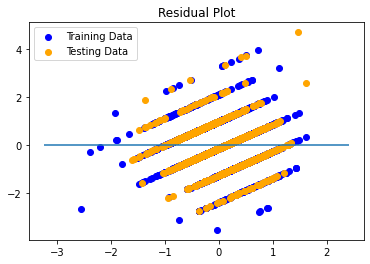

In [11]:
predictions = model.predict(x_test_scaled)
model.fit(x_train_scaled, y_train_scaled)
plt.scatter(model.predict(x_train_scaled), model.predict(x_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(x_test_scaled), model.predict(x_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(x_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7178649164843954, R2: 0.27275629346755526


In [13]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(x_train_scaled, y_train_scaled)

predictions = elasticnet.predict(x_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(x_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7209717529169216, R2: 0.2696088667151162


In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(x_train_scaled, y_train_scaled)

predictions = ridge.predict(x_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(x_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7178655740764665, R2: 0.27275562728414915


## Red Wines

In [19]:
x=r_data.drop(["quality"],axis=1)
y=r_data["quality"].values.reshape(-1,1)
print(x.shape,y.shape)

(1599, 11) (1599, 1)


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(x_train)
y_scaler = StandardScaler().fit(y_train)

In [22]:
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled, y_train_scaled)

LinearRegression()

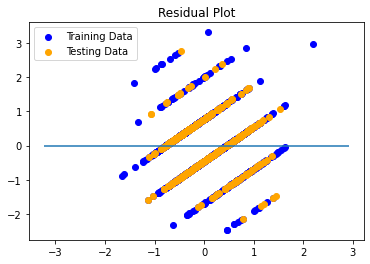

In [24]:
predictions = model.predict(x_test_scaled)
model.fit(x_train_scaled, y_train_scaled)
plt.scatter(model.predict(x_train_scaled), model.predict(x_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(x_test_scaled), model.predict(x_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(x_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5861039318774236, R2: 0.3722831200818114


In [26]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(x_train_scaled, y_train_scaled)

predictions = elasticnet.predict(x_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(x_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5890703471652394, R2: 0.36910609149057716


In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(x_train_scaled, y_train_scaled)

predictions = ridge.predict(x_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(x_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.58610407027676, R2: 0.37228297185622394
